In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

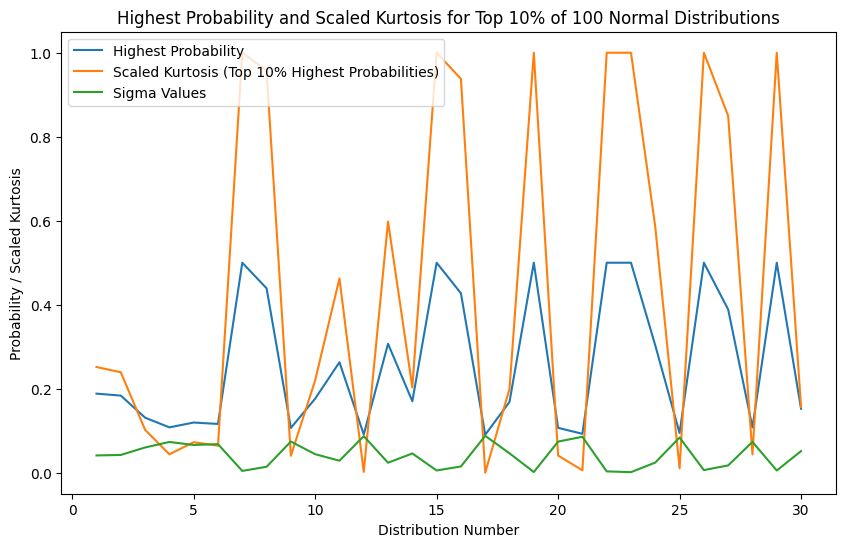

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Generate 100 normal distributions using probability density functions (PDFs) with different sigma values
num_distributions = 30
mean_value = 0  # Mean of the normal distributions
sigma_values = np.random.uniform(1e-5, 1e-1, num_distributions)  # Random sigma values between 0.1 and 5
x_values = np.linspace(-10, 10, 1000)  # Common x range for the PDFs

# Generate PDFs and normalize each to ensure area sums to 1
distributions = [stats.norm.pdf(x_values, mean_value, sigma) for sigma in sigma_values]
normalized_distributions = [dist / np.sum(dist) for dist in distributions]  # Sum of each PDF = 1

# Get the highest probability for each normalized distribution
highest_probabilities = [np.max(dist) for dist in normalized_distributions]

# Calculate kurtosis using only the top 10% highest probability values for each distribution
top_10_percent_kurtosis = [
    stats.kurtosis(np.sort(dist)[-int(0.1 * len(dist)):]) for dist in normalized_distributions
]

# Scale these kurtosis values to range from 0 to 1
scaled_top_10_percent_kurtosis = scaler.fit_transform(np.array(top_10_percent_kurtosis).reshape(-1, 1)).flatten()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
dist_indices = np.arange(1, num_distributions + 1)

# Plot highest probabilities and scaled kurtosis values for top 10% values
ax.plot(dist_indices, highest_probabilities, label='Highest Probability')
ax.plot(dist_indices, scaled_top_10_percent_kurtosis, label='Scaled Kurtosis (Top 10% Highest Probabilities)')
ax.plot(dist_indices, sigma_values, label='Sigma Values')

# Add legend and titles
ax.set_xlabel('Distribution Number')
ax.set_ylabel('Probability / Scaled Kurtosis')
ax.set_title('Highest Probability and Scaled Kurtosis for Top 10% of 100 Normal Distributions')
ax.legend()
plt.show()
